# 1 Business Intelligence (BI) e Ciclo Analítico de Inteligência de Dados

O BI é uma estratégia focada na análise de dados corporativos e na apresentação de informações acionáveis para ajudar os executivos, gerentes e outros usuários finais corporativos a tomar decisões de negócios informadas. O ciclo analítico de inteligência de dados é um processo que inclui várias etapas, desde a definição do problema até a comunicação dos resultados.

## Importância do BI e do Ciclo Analítico de Inteligência de Dados

Ambos são fundamentais para transformar dados brutos em insights significativos que podem impulsionar o sucesso do negócio. As organizações usam BI e análise de dados para identificar e resolver problemas, melhorar a eficiência, aumentar a produtividade e obter uma vantagem competitiva.

*Exemplos reais:*
1. Empresas de varejo utilizam BI para otimizar a cadeia de suprimentos, gerenciar inventário e melhorar a experiência do cliente.
2. O setor de saúde usa análise de dados para melhorar o atendimento ao paciente, prever surtos de doenças e melhorar a eficiência operacional.


# 2 - Fases do Projeto de BI

Um projeto de BI normalmente passa pelas seguintes fases:

1. **Estratégia de BI:** Definição dos objetivos e metas do projeto. Identificação das necessidades e expectativas dos usuários finais.

2. **Análise de Requisitos:** Coleta e análise detalhada dos requisitos do usuário. Identificação das fontes de dados necessárias.

3. **Design da Solução:** Design do data warehouse, esquema de dados, ETL, relatórios e painéis.

4. **Implementação:** Desenvolvimento e teste do sistema de BI. Importação e transformação dos dados. Configuração dos relatórios e dashboards.

5. **Entrega:** Lançamento do sistema de BI para os usuários finais. Treinamento e suporte.

6. **Manutenção:** Monitoramento e atualização do sistema conforme necessário. Resolução de problemas e melhorias contínuas.

Vamos explorar cada fase com mais detalhes.

In [2]:
# Importando as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import MeanSquaredError
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# 1. Estratégia de BI
# Definição dos objetivos: Vamos tentar prever a quantidade vendida com base nas outras características do conjunto de dados.

# 2. Análise de Requisitos
# Identificamos que precisamos das informações de quantidade vendida e das outras características como requisitos para nosso modelo.

# 3. Design da Solução
# Nosso data warehouse será o próprio dataframe do pandas. Vamos usar um modelo de regressão linear para prever a quantidade vendida.

# 4. Implementação
# Carregando os dados
df = pd.read_csv('superstore_dataset.csv')

In [3]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.3,2,0.0,106.14,35.46,Medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [ ]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [ ]:
df.describe(include = 'O')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25035,1430,1464,4,1590,795,3,3636,1094,147,7,13,10292,3,17,3788,4
top,CA-2014-100111,18-06-2014,22-11-2014,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,United States,APAC,Central,OFF-AR-10003651,Office Supplies,Binders,Staples,Medium
freq,14,135,130,30775,97,108,26518,915,2001,9994,11002,11117,35,31273,6152,227,29433


In [ ]:
round(df.isna().sum() * 100 / len(df),4)

Row ID             0.0000
Order ID           0.0000
Order Date         0.0000
Ship Date          0.0000
Ship Mode          0.0000
Customer ID        0.0000
Customer Name      0.0000
Segment            0.0000
City               0.0000
State              0.0000
Country            0.0032
Postal Code       80.6510
Market             0.0032
Region             0.0032
Product ID         0.0032
Category           0.0032
Sub-Category       0.0032
Product Name       0.0032
Sales              0.0032
Quantity           0.0032
Discount           0.0032
Profit             0.0032
Shipping Cost      0.0032
Order Priority     0.0032
dtype: float64

In [5]:
# Tratando valores nulos
# Apagando colunas com mais de 40% de valores nulos
df.drop('Postal Code', axis=1, inplace = True)

# Excluindo coluna irrelevante
df.drop('Row ID', axis=1, inplace = True)


# Substituindo valores nulos pela média (colunas numéricas) ou pela moda (colunas categóricas)
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

# Preparando os dados
features = df.drop('Quantity', axis=1) # X
target = df[['Quantity']] # y

# Convertendo categorias em variáveis numéricas
label_encoder = LabelEncoder()
for column in features.columns:
    if features[column].dtype == 'object':
        features[column] = label_encoder.fit_transform(features[column])

# Criando os normalizadores
normalizador_features = MinMaxScaler()
normalizador_target = MinMaxScaler()

# Normalizando as features
features = normalizador_features.fit_transform(features)

# Normalizando o target
target = normalizador_target.fit_transform(target)

# Dividindo os dados em conjuntos de treinamento, validação e teste
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)
features_train, features_val, target_train, target_val = train_test_split(features_train, target_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

In [6]:
from keras.callbacks import EarlyStopping

# Definindo o modelo
model = Sequential()
model.add(Dense(32, input_dim=features_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compilando o modelo
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=[MeanSquaredError()])

# Definindo o critério de parada antecipada
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

# Treinando o modelo
model.fit(features_train, target_train, validation_data=(features_val, target_val), epochs=50, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
962/962 [==============================] - 3s 2ms/step - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 2/50
962/962 [==============================] - 2s 2ms/step - loss: 0.0270 - mean_squared_error: 0.0270 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 3/50
962/962 [==============================] - 2s 2ms/step - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 4/50
962/962 [==============================] - 3s 3ms/step - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 5/50
962/962 [==============================] - 2s 2ms/step - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 6/50
962/962 [==============================] - 2s 2ms/step - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 7/50
962/962 [========

In [7]:
# Testando o modelo
predictions = model.predict(features_test)

# Revertendo a escala das previsões
predictions = normalizador_target.inverse_transform(predictions)

# Revertendo a escala do target de teste
target_test = normalizador_target.inverse_transform(target_test)


mse = mean_squared_error(target_test, predictions)
print(f'Mean Squared Error: {mse}')

# Calculando R2 e R2 ajustado
r2 = r2_score(target_test, predictions)
print(f'R2 Score: {r2}')

# Função para calcular o R2 ajustado
def adjusted_r2(r2, n, p):
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

n = features_test.shape[0]
p = features_test.shape[1]
adj_r2 = adjusted_r2(r2, n, p)
print(f'Adjusted R2 Score: {adj_r2}')

321/321 [==============================] - 0s 926us/step
Mean Squared Error: 3.164354994927039
R2 Score: 0.3875183322931075
Adjusted R2 Score: 0.3862617755305201


In [ ]:
# 5. Entrega
# Nesta fase, normalmente forneceríamos o modelo para os usuários finais e os treinaríamos sobre como usá-lo. 
# No entanto, essa parte é difícil de demonstrar em um script Python.

# 6. Manutenção
# Em um projeto de BI real, esta fase envolveria monitorar o desempenho do modelo ao longo do tempo e fazer ajustes conforme necessário. 
# Isso também é difícil de demonstrar em um script Python, mas é uma parte importante do processo de BI.

# 3 - Resumo e Perguntas

Hoje aprendemos sobre a importância do BI e do ciclo analítico de inteligência de dados. Também exploramos as fases de um projeto de BI, desde a estratégia inicial até a manutenção contínua.

Algumas perguntas para reflexão:

1. Por que é importante definir claramente os objetivos e metas na estratégia de BI? 
* Para atender as expectativas do cliente
2. Como a análise de requisitos pode impactar o sucesso de um projeto de BI?
* Para direcionar o projeto com as expectativas, de forma direta
3. Por que a fase de manutenção é crucial em um projeto de BI?
* Para manter a integridade do projeto

In [ ]:
# Exemplo: Importância de definir claramente os objetivos e metas na estratégia de BI
def importance_of_bi_strategy(objectives, user_needs):
    # Verificar se os objetivos do projeto estão alinhados com as necessidades dos usuários
    if objectives.equals(user_needs):
        print("Uma estratégia de BI claramente definida ajuda a garantir que os objetivos do projeto atendam às necessidades dos usuários.\n")
    else:
        print("É importante garantir que os objetivos do projeto estejam alinhados com as necessidades dos usuários para uma estratégia de BI eficaz.\n")

# Exemplo: Impacto da análise de requisitos no sucesso do projeto de BI
def impact_of_requirements_analysis(requirements):
    # Verificar se todos os requisitos foram identificados e analisados adequadamente
    if not requirements.empty:
        print("Uma análise de requisitos completa e precisa é essencial para garantir que o projeto de BI atenda às necessidades dos usuários.\n")
    else:
        print("Certifique-se de identificar e analisar adequadamente todos os requisitos para um projeto de BI bem-sucedido.\n")

# Exemplo: Importância da fase de manutenção em um projeto de BI
def importance_of_maintenance(project_success):
    # Verificar se a fase de manutenção é crucial para manter o sucesso do projeto de BI
    if not project_success.empty:
        print("A fase de manutenção em um projeto de BI é crucial para monitorar e atualizar o sistema, garantindo que continue atendendo às necessidades em constante mudança.\n")
    else:
        print("Se a fase de manutenção for negligenciada, o sistema de BI pode se tornar obsoleto e não entregar os resultados esperados.\n")

# Chamada das funções com base na base de dados
importance_of_bi_strategy(df['Sales'], df['Order Priority'])
impact_of_requirements_analysis(df['Sales'])
importance_of_maintenance(df['Profit'])

É importante garantir que os objetivos do projeto estejam alinhados com as necessidades dos usuários para uma estratégia de BI eficaz.

Uma análise de requisitos completa e precisa é essencial para garantir que o projeto de BI atenda às necessidades dos usuários.

A fase de manutenção em um projeto de BI é crucial para monitorar e atualizar o sistema, garantindo que continue atendendo às necessidades em constante mudança.



# 4 - Introdução ao Ciclo Analítico da Inteligência de Dados

O Ciclo Analítico da Inteligência de Dados é um processo iterativo que nos permite transformar dados brutos em insights significativos para tomada de decisões. Ele consiste em sete etapas principais:

1. **Definição do problema:** Onde identificamos a questão de negócios que queremos resolver.
2. **Preparação de dados:** Aqui, coletamos, limpamos e formatamos os dados necessários para nossa análise.
3. **Análise exploratória de dados (EDA):** Nesta fase, examinamos os dados para identificar padrões, detectar anomalias e formular hipóteses.
4. **Modelagem de dados:** Aqui, criamos modelos matemáticos ou estatísticos para testar nossas hipóteses.
5. **Validação:** Nesta etapa, verificamos a precisão de nossos modelos e ajustamos conforme necessário.
6. **Implementação:** Aqui, aplicamos nossos modelos validados ao ambiente de produção.
7. **Comunicação:** Nesta fase, compartilhamos nossos resultados e insights com as partes interessadas.

Vamos explorar cada uma dessas fases com mais detalhes.


# 5 - Aprofundando no Ciclo Analítico da Inteligência de Dados

Agora que temos uma visão geral do Ciclo Analítico, vamos explorar cada uma das fases com mais profundidade.

1. **Definição do problema:** Esta é talvez a etapa mais crucial do ciclo. Uma definição de problema clara e precisa nos ajuda a direcionar nossos esforços de coleta de dados e análise. Precisamos entender o contexto do negócio e as necessidades das partes interessadas.

2. **Preparação de dados:** Os dados brutos raramente estão em um formato que possamos usar diretamente para análise. Eles podem precisar ser limpos, transformados ou agregados de alguma forma. Esta etapa pode incluir tarefas como lidar com valores ausentes, remover outliers e normalizar os dados.

3. **Análise exploratória de dados (EDA):** Nesta fase, visualizamos os dados e calculamos estatísticas resumidas para entender os padrões nos dados. Isso nos ajuda a construir intuições sobre os dados e formular hipóteses para testar na próxima etapa.

4. **Modelagem de dados:** Aqui, criamos modelos estatísticos ou de aprendizado de máquina para testar nossas hipóteses. O tipo de modelo que escolhemos dependerá do nosso problema e dos dados disponíveis.

5. **Validação:** Nesta etapa, avaliamos a qualidade de nossos modelos. Isso pode envolver a divisão dos dados em conjuntos de treinamento e teste, a aplicação do modelo ao conjunto de teste e a comparação das previsões do modelo com os resultados reais.

6. **Implementação:** Uma vez que estamos satisfeitos com a qualidade de nossos modelos, podemos implementá-los em um ambiente de produção. Isso pode envolver a escrita de código para automatizar o processo de coleta de dados, análise e relatórios.

7. **Comunicação:** Por fim, comunicamos nossos resultados às partes interessadas. Isso pode incluir a criação de relatórios, dashboards ou apresentações, e deve sempre incluir interpretações claras e acionáveis dos resultados.


# 6 - Resumo e Perguntas

Nesta seção, recapitulamos os pontos importantes cobertos na aula. No contexto do ciclo analítico da inteligência de dados, podemos reiterar as fases e a importância de cada uma delas, bem como como elas se encaixam no projeto de BI como um todo. Podemos também revisitar quaisquer conceitos teóricos que tenham sido particularmente importantes.

Perguntas de reflexão podem ser apresentadas para incentivar os alunos a pensar mais profundamente sobre o material. Por exemplo:

1. Como cada fase do ciclo analítico contribui para a eficácia geral de um projeto de BI?
2. Pode existir um projeto de BI bem-sucedido sem uma ou mais dessas fases?
3. Como a fase de implementação pode variar dependendo do ambiente de TI de uma organização?

# 7 - Revisão dos Conceitos

## Business Intelligence (BI)

- Business Intelligence é o processo de transformação de dados brutos em informações significativas para análise de negócios.

## Fases do Projeto de BI

1. **Estratégia de BI:** Definir a visão e os objetivos do projeto.
2. **Análise de requisitos:** Identificar as necessidades da empresa e dos usuários finais.
3. **Design de solução:** Projetar a solução que atenderá aos requisitos identificados.
4. **Implementação:** Desenvolver e testar a solução.
5. **Entrega:** Lançar a solução para os usuários finais.
6. **Manutenção:** Fornecer suporte contínuo e atualizações para a solução.

## O Ciclo Analítico da Inteligência de Dados

1. **Definição do problema:** Identificar o problema a ser resolvido.
2. **Preparação de dados:** Coletar e preparar os dados para análise.
3. **Análise exploratória:** Analisar os dados para obter insights e identificar padrões.
4. **Modelagem de dados:** Criar um modelo que represente os padrões nos dados.
5. **Validação:** Verificar a precisão do modelo.
6. **Implementação:** Implementar o modelo na prática.
7. **Comunicação:** Comunicar os resultados da análise.


Descrição do problema:
A empresa Superstore possui uma base de dados contendo informações de vendas de seus produtos entre 2011 e 2015. Eles estão buscando insights para otimizar suas vendas e melhorar sua lucratividade. Sua tarefa é realizar uma análise e propor soluções para os seguintes questionamentos:

Pode usar "df['Order Date'] = pd.to_datetime(df['Order Date'])" para conveter colunas com datas para o tipo de dados de datas.

1 - Qual a categoria de produto mais vendida durante todo o período?

2 - Qual a categoria de produto mais vendida cada ano?

3 - Qual a categoria de produto mais vendida no mese de dezembro de cada ano?

4 - Qual a região que apresentou maior lucratividade média?

5 - Existe alguma relação entre a quantidade vendida e o desconto aplicado?

7 - Qual a média da quantidade de compras dos produtos com 50% (0.5) ou mais de desconto?

8 - Qual a moda da quantidade de compras dos produtos com 50% (0.5) ou mais de desconto?

9 - Preparação de dados:

    9.1 - Verificar e tratar valores nulos, se necessário.

    9.2 - Selecionar as colunas relevantes para a análise.


10 - Análise exploratória de dados:

    10.1 - Calcular as vendas totais por categoria de produto.
    10.2 - Visualizar as vendas por categoria em um gráfico de barras.
    10.3 - Modelagem de dados:

11 - Realizar uma regressão linear para analisar a relação entre a quantidade vendida e o desconto aplicado (o X será apenas a coluna "Discount" e o y "Quantity"). (normalize os dados e separe em treinamento 70%, validação 15% e teste 15%)


12 - Avaliar a qualidade do modelo de regressão, utilizando métricas como o erro quadrático médio (MSE) e o coeficiente de determinação (R^2). (Não esqueça de desnormalizar o y de teste e o y predict andes verificar as métricas)


13 - Aplique Redução de Dimensionalidade com PCA para reduzir as colunas de X para apenas 3 Colunas (material sobre isto na aula 5, a partir do tópico 2.4)

14 - Realize o tratamento dos dados reduzidos para separar em X e y (Precisa normalizar?)

15 - Crie uma rede neural com a seguinte estrutura:
- camada de entrada
- camada oculta com 20 neurônios e função de ativação relu
- camada oculta com 40 neurônios e função de ativação relu
- camada oculta com 40 neurônios e função de ativação relu
- camada oculta com 40 neurônios e função de ativação relu
- camada oculta com 40 neurônios e função de ativação relu
- camada oculta com 40 neurônios e função de ativação relu
- camada oculta com 40 neurônios e função de ativação relu
- camada de saída com 1 neurônio e função de ativação linear

- Defina para a rede treinar 100 épocas, mas parar o treinamento caso fique 30 épocas sem melhorar a métrica MSE de validação

16 - Exiba o gráfico de loss durante o treinamento (esqueceu de fazer o history no fit? rsrs)

17 - Exiba as métricas de MSE, MAE, R2 e R2 ajustado.

18 - Seu modelo ficou bom?

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

<ipython-input-8-f5779b1b9e1a>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [ ]:
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,AG-2011-2040,2011-01-01,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.46,Medium
1,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.72,Medium
2,HU-2011-1220,2011-01-01,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.17,High
3,IT-2011-3647632,2011-01-01,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.82,High
4,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,MO-2014-2560,2014-12-31,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,Morocco,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,MX-2014-110527,2014-12-31,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,MX-2014-114783,2014-12-31,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,Mexico,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium


In [9]:
df['Order Date'].min()
df['Order Date'].max()

Timestamp('2014-12-31 00:00:00')

In [10]:
df['Category'].mode()[0]

'Office Supplies'

In [11]:
df['Category'].value_counts()

Office Supplies    31273
Technology         10141
Furniture           9876
Name: Category, dtype: int64

In [12]:
#df_periodo = df[(df['Order Date'].dt.year >=2011) & df[(df['Order Date'].dt.year <=2014)]]
df2011 = df.loc[df['Order Date'].dt.year == 2011]
df2012 = df.loc[df['Order Date'].dt.year == 2012]
df2013 = df.loc[df['Order Date'].dt.year == 2013]
df2014 = df.loc[df['Order Date'].dt.year == 2014]

In [13]:
df_2011 = df2011.groupby('Order Date')['Category'].sum()
df_2012 = df2012.groupby('Order Date')['Category'].sum()
df_2013 = df2013.groupby('Order Date')['Category'].sum()
df_2014 = df2014.groupby('Order Date')['Category'].sum()


categoria de produtos vendidos em cada ano

In [14]:
print(df_2011.mode(0))
print(df_2012.mode(0))
print(df_2013.mode(0))
print(df_2014.mode(0))



0    Technology
Name: Category, dtype: object
0    Office Supplies
Name: Category, dtype: object
0    Office SuppliesOffice Supplies
Name: Category, dtype: object
0    FurnitureOffice SuppliesOffice SuppliesOffice ...
1                                      Office Supplies
2                       Office SuppliesOffice Supplies
Name: Category, dtype: object


Categoria de produto mais ventida em todo o período

In [15]:
dftop = df.groupby('Order Date')['Category'].sum()
dftop.mode(0)

0    Office Supplies
Name: Category, dtype: object

Produtos mais vendidos em determinado mes

In [16]:
df['Ano'] = df['Order Date'].dt.year
df['Mes'] = df['Order Date'].dt.month 

In [17]:
df_dezembro = df[df['Mes'] == 12]

In [18]:
tabela_dinamica = pd.pivot_table(df_dezembro, values='Quantity', index='Ano', columns='Category', aggfunc=sum)

In [19]:
categoria_top = tabela_dinamica.idxmax(axis=1)

In [20]:
categoria_top

Ano
2011    Office Supplies
2012    Office Supplies
2013    Office Supplies
2014    Office Supplies
dtype: object

região que apresentou maior lucratividade média

In [21]:
media_lucro = df.groupby('State')['Profit'].mean()

In [22]:
regiao_media_lucro = media_lucro.idxmax()
regiao_media_lucro

'Paysandú'

 Existe alguma relação entre a quantidade vendida e o desconto aplicado

 O valor da correlacao varia entre -1 e 1.
 * quanto mais proximo de 1 maior é a relação
 * proximo de 0 temos uma relacao fraca ou inexistente
 * proximo de -1 a relação é antagonica (contraia)

In [23]:
relacao = df['Quantity'].corr(df['Discount'])
relacao

-0.01987469514765295

média e moda das compras com 50% de desconto ou mais

In [24]:
descontos = df[df['Discount'] >= 0.5]
media = descontos['Quantity'].mean()
moda = descontos['Quantity'].mode()
print(media)
print(moda)

3.114900947459087
0    1
Name: Quantity, dtype: int64


In [25]:
df.isna().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
Ano               0
Mes               0
dtype: int64

## 10 Análise de dados
10.1 - Calcular as vendas totais por categoria de produto.

10.2 - Visualizar as vendas por categoria em um gráfico de barras.

10.3 - Modelagem de dados:


In [27]:
#10.1
valor_t = df.groupby('Category')['Profit'].sum()
# visualização em moeda corrente
valor_t = valor_t.map('R${:,.2f}'.format)
valor_t

Category
Furniture          R$285,204.72
Office Supplies    R$518,473.83
Technology         R$663,778.73
Name: Profit, dtype: object

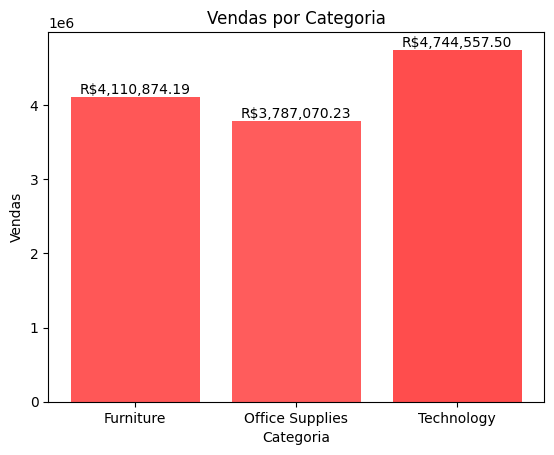

In [33]:
#10.2
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
vendas_categoria = df.groupby('Category')['Sales'].sum()


cores_gradiente = mcolors.LinearSegmentedColormap.from_list('gradiente', ['#ff9999', '#ff4d4d'])
plt.bar(vendas_categoria.index, vendas_categoria.values, color=cores_gradiente(vendas_categoria.values/vendas_categoria.max()))

# Adicionar rótulos de dados em moeda corrente
for i, valor in enumerate(vendas_categoria.values):
    plt.annotate('R${:,.2f}'.format(valor), (vendas_categoria.index[i], valor), ha='center', va='bottom')

# Adicionar rótulos e título
plt.xlabel('Categoria')
plt.ylabel('Vendas')
plt.title('Vendas por Categoria')

# Exibir o gráfico
plt.show()

Questao 11

In [34]:

from sklearn.preprocessing import StandardScaler

X = df[['Discount']]
#X = df['Discount'].values.reshape(-1, 1)
# Nessa segunda forma o X será uma matriz unidimensional, que precisa passar pelo reshape para ter uma unica coluna
y = df['Quantity']

# Normalizar os dados
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Dividir os dados em conjuntos de treinamento, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X_normalized, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Criar um modelo de regressão linear
model = LinearRegression()

# Treinar o modelo usando os dados de treinamento
model.fit(X_train, y_train)

# Avaliar o desempenho do modelo usando os dados de validação
y_val_pred = model.predict(X_val)
r2 = r2_score(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
print("Desempenho do modelo (validação)")
print("R²:", r2)
print("MSE:", mse)

# Testar o modelo usando os dados de teste
y_test_pred = model.predict(X_test)
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
print("Desempenho do modelo (teste)")
print("R²:", r2)
print("MSE:", mse)

Desempenho do modelo (validação)
R²: -0.000563540598109924
MSE: 5.241119465884364
Desempenho do modelo (teste)
R²: 0.0007938464775260057
MSE: 5.116840560997158


Questao 12

In [36]:
y_pred_desnormalized = scaler.inverse_transform(y_test_pred.reshape(-1, 1))
y_test_desnormalized = scaler.inverse_transform(y_test.reshape(-1, 1))


mse = mean_squared_error(y_test_desnormalized, y_pred_desnormalized)
print("Erro Quadrático Médio (MSE):", mse)


r2 = r2_score(y_test_desnormalized, y_pred_desnormalized)
print("Coeficiente de Determinação (R²):", r2)


Erro Quadrático Médio (MSE): 0.23057451064535409
Coeficiente de Determinação (R²): 0.0007938464775261167


Questao 13

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=min(X.shape[0], X.shape[1]))
X_reduced = pca.fit_transform(X)

explained_variance_ratio = pca.explained_variance_ratio_
print("Variância explicada por cada componente:", explained_variance_ratio)


Variância explicada por cada componente: [1.]


Tratamento dos dados reduzidos?

In [57]:
X = X_reduced 
y = df['Quantity']


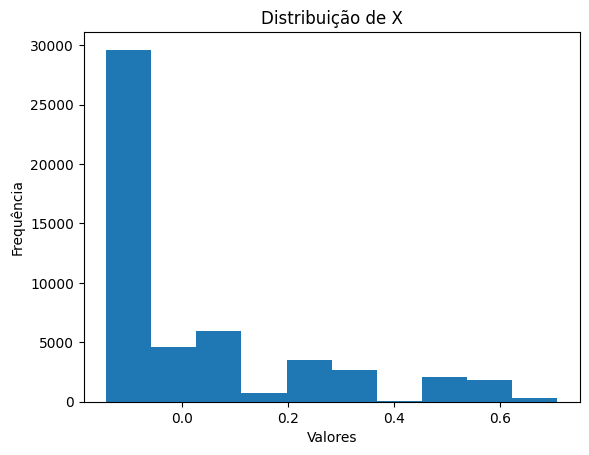

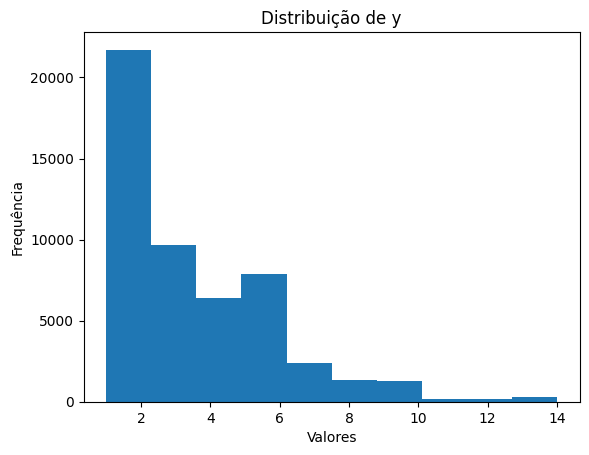

In [50]:
# Histograma de X
plt.hist(X, bins=10)
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Distribuição de X')
plt.show()

# Histograma de y
plt.hist(y, bins=10)
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Distribuição de y')
plt.show()

In [51]:
print("Estatísticas de X:")
print("Média:", np.mean(X))
print("Mediana:", np.median(X))
print("Desvio padrão:", np.std(X))
print("Mínimo:", np.min(X))
print("Máximo:", np.max(X))

print("Estatísticas de y:")
print("Média:", np.mean(y))
print("Mediana:", np.median(y))
print("Desvio padrão:", np.std(y))
print("Mínimo:", np.min(y))
print("Máximo:", np.max(y))

Estatísticas de X:
Média: -8.381328819162811e-18
Mediana: -0.14290754533047378
Desvio padrão: 0.21227786226720344
Mínimo: -0.14290754533047378
Máximo: 0.7070924546695262
Estatísticas de y:
Média: 3.4765451355039967
Mediana: 3.0
Desvio padrão: 2.2787440991667864
Mínimo: 1
Máximo: 14


In [52]:

X_normalized = scaler.fit_transform(X)
y_normalized = scaler.fit_transform(y)

ValueError: ignored

In [59]:

X_reshaped = X.reshape(-1, 1)
y_reshaped = df['Quantity'].values.reshape(-1, 1)

X_normalized = scaler.fit_transform(X_reshaped)
y_normalized = scaler.fit_transform(y_reshaped)

In [61]:

model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(X_normalized.shape[1],)))
model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='linear'))


model.compile(loss='mean_squared_error', optimizer='adam')


early_stopping = EarlyStopping(monitor='val_loss', patience=30)


history = model.fit(X_normalized, y_normalized, epochs=100, validation_split=0.15, callbacks=[early_stopping])



Epoch 1/100
1363/1363 [==============================] - 4s 2ms/step - loss: 0.9907 - val_loss: 1.0192
Epoch 2/100
1363/1363 [==============================] - 2s 2ms/step - loss: 0.9881 - val_loss: 1.0135
Epoch 3/100
1363/1363 [==============================] - 3s 2ms/step - loss: 0.9867 - val_loss: 1.0120
Epoch 4/100
1363/1363 [==============================] - 2s 2ms/step - loss: 0.9858 - val_loss: 1.0136
Epoch 5/100
1363/1363 [==============================] - 2s 2ms/step - loss: 0.9860 - val_loss: 1.0107
Epoch 6/100
1363/1363 [==============================] - 2s 2ms/step - loss: 0.9853 - val_loss: 1.0108
Epoch 7/100
1363/1363 [==============================] - 2s 2ms/step - loss: 0.9856 - val_loss: 1.0125
Epoch 8/100
1363/1363 [==============================] - 3s 2ms/step - loss: 0.9849 - val_loss: 1.0105
Epoch 9/100
1363/1363 [==============================] - 2s 2ms/step - loss: 0.9849 - val_loss: 1.0145
Epoch 10/100
1363/1363 [==============================] - 2s 2ms/step - l

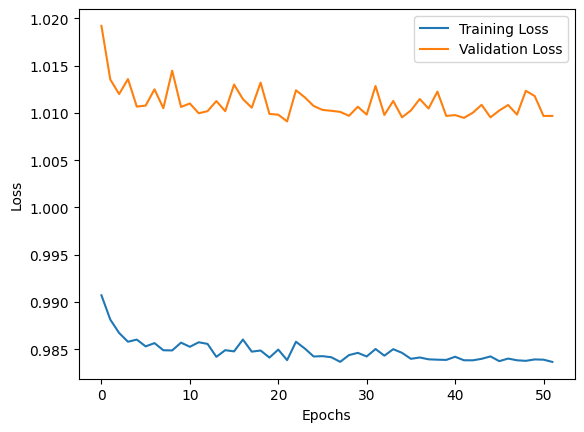

In [63]:


train_loss = history.history['loss']
val_loss = history.history['val_loss']


plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = model.predict(X_normalized)


y_pred_denormalized = scaler.inverse_transform(y_pred)
y_denormalized = scaler.inverse_transform(y_normalized)


mse = mean_squared_error(y_denormalized, y_pred_denormalized)
mae = mean_absolute_error(y_denormalized, y_pred_denormalized)
r2 = r2_score(y_denormalized, y_pred_denormalized)


n = X_normalized.shape[0]  
p = X_normalized.shape[1]  
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)


print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2 Score:", r2)
print("Adjusted R2 Score:", adj_r2)

1603/1603 [==============================] - 4s 2ms/step
Mean Squared Error (MSE): 5.131992573502109
Mean Absolute Error (MAE): 1.7623004240096254
R2 Score: 0.011686096250533962
Adjusted R2 Score: 0.011666826364717608
